In [1]:
import pandas as pd
import numpy as np

In [2]:
from gprofiler import GProfiler
gp = GProfiler(return_dataframe=True)

In [3]:
from goatools.base import download_go_basic_obo

# IO

In [3]:
import PineBioML.IO as IO

In [4]:
# Path
input_folder = "./input/"
output_folder = "./output/"
export_title = "example_ccRCC_proteomics "

The data is from  [LinkedOmicsKB](https://kb.linkedomics.org/).

In [5]:
##### Read data method 2: read several files at once
x, group_label = IO.read_multiple_groups(
    [
        input_folder+ "CCRCC_proteomics_gene_abundance_log2_reference_intensity_normalized_Normal.txt",
        input_folder+ "CCRCC_proteomics_gene_abundance_log2_reference_intensity_normalized_Tumor.txt"
    ],
    transpose= True # Set True to transpose data before merging
    )

y = group_label

In [6]:
x.head(5)

idx,ENSG00000000003.15,ENSG00000000419.12,ENSG00000000457.14,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,ENSG00000001461.17,ENSG00000001497.16,...,ENSG00000168701.19,ENSG00000181631.7,ENSG00000185046.18,ENSG00000187626.9,ENSG00000197580.13,ENSG00000205060.11,ENSG00000211645.2,ENSG00000218336.9,ENSG00000230667.5,ENSG00000243232.6
C3L-01287,23.910682,25.408087,20.530891,18.652968,27.897499,25.799120,25.559402,18.816175,NaN,23.234695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C3L-00561,23.465741,25.284497,20.781890,19.239574,27.379201,25.720201,25.609840,19.186315,NaN,23.153964,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C3N-01524,23.688758,24.950765,20.792161,19.915342,28.317880,25.268082,25.164925,20.709017,NaN,23.627795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C3L-01603,23.753836,25.238511,20.878394,19.312896,28.491202,25.647752,25.857748,19.940423,NaN,23.216209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C3N-00834,23.545379,25.241886,20.826577,NaN,28.192978,26.344376,25.673238,19.899800,20.191294,23.256864,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
y.head(5)

C3L-01287    0.0
C3L-00561    0.0
C3N-01524    0.0
C3L-01603    0.0
C3N-00834    0.0
dtype: float64

# Preprocessing

In [8]:
# Convert ENSEMBL ID to gene symbol by gprofiler
x.columns = [col.split(".")[0] for col in x.columns]
gene_name = gp.convert(query=x.columns.to_list())["name"]

# For those who can't find a gene symbol, they will remain in ENSEMBL ID
matched = gene_name == "None"
x.columns = x.columns.where(matched, gene_name)

# The result
x.head(5)

,TSPAN6,DPM1,SCYL3,FGR,CFH,FUCA2,GCLC,NFYA,NIPAL3,LAS1L,...,TMEM208,P2RY13,ANKS1B,ZKSCAN4,BCO2,SLC35B4,IGLV1-50,TENM3,SETSIP,PCDHAC2
C3L-01287,23.910682,25.408087,20.530891,18.652968,27.897499,25.799120,25.559402,18.816175,NaN,23.234695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C3L-00561,23.465741,25.284497,20.781890,19.239574,27.379201,25.720201,25.609840,19.186315,NaN,23.153964,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C3N-01524,23.688758,24.950765,20.792161,19.915342,28.317880,25.268082,25.164925,20.709017,NaN,23.627795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C3L-01603,23.753836,25.238511,20.878394,19.312896,28.491202,25.647752,25.857748,19.940423,NaN,23.216209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C3N-00834,23.545379,25.241886,20.826577,NaN,28.192978,26.344376,25.673238,19.899800,20.191294,23.256864,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
### Revert to Original scale
x = np.power(2, x)

In [10]:
# Impute 0
from PineBioML.preprocessing import impute

# The imputer will drop the features with missing value more than 50%.
# Remaining will be filled by 0.
simple = impute.simple_imputer(threshold = 0.5, strategy = "constant")
x = simple.fit_transform(x, y)

# retsult
x.head(5)

,TSPAN6,DPM1,SCYL3,FGR,CFH,FUCA2,GCLC,NFYA,LAS1L,ENPP4,...,IGHV1-69D,PAGR1,IGHV3-64D,IGHV5-10-1,IQCJ-SCHIP1,SCO2,MIURF,ENSG00000285723,ASDURF,DERPC
C3L-01287,1.577003e+07,4.452421e+07,1.515005e+06,412195.029998,2.500253e+08,5.838602e+07,4.944778e+07,4.615653e+05,9.870520e+06,1.927286e+07,...,4.171632e+05,0.000000e+00,1.132988e+07,1.307512e+07,500761.839790,4.856449e+07,2.976494e+06,7.616187e+06,1.606048e+06,7.998814e+06
C3L-00561,1.158489e+07,4.086881e+07,1.802902e+06,618997.312051,1.745664e+08,5.527797e+07,5.120709e+07,5.965628e+05,9.333354e+06,1.975832e+07,...,7.009272e+05,0.000000e+00,9.995554e+06,8.901724e+06,519397.129831,4.426385e+07,3.111857e+06,8.900577e+06,1.493852e+06,8.444307e+06
C3N-01524,1.352156e+07,3.242864e+07,1.815784e+06,988815.550948,3.346041e+08,4.040644e+07,3.761815e+07,1.714096e+06,1.296209e+07,1.598119e+07,...,1.068798e+06,0.000000e+00,2.254598e+07,4.585925e+06,616126.588622,2.625604e+07,2.515705e+06,5.260971e+06,1.561090e+06,9.395700e+06
C3L-01603,1.414546e+07,3.958667e+07,1.927626e+06,651269.819153,3.773170e+08,5.257057e+07,6.080757e+07,1.006156e+06,9.744856e+06,2.420615e+07,...,9.472778e+05,0.000000e+00,1.660177e+07,2.142705e+07,482998.878520,4.568375e+07,3.245089e+06,8.697766e+06,1.307165e+06,9.058640e+06
C3N-00834,1.224236e+07,3.967937e+07,1.859621e+06,0.000000,3.068542e+08,8.520154e+07,5.350751e+07,9.782205e+05,1.002337e+07,1.740495e+07,...,0.000000e+00,1.214560e+06,2.384113e+07,3.265534e+07,767109.170522,5.551350e+07,4.141263e+06,1.055341e+07,1.316724e+06,8.411947e+06


In [11]:
# make a copy for volcanal plot
x_copy = x.copy()

In [12]:
from PineBioML.preprocessing import Normalizer
### within sample normalization
x = Normalizer(method = "Normalizer").fit_transform(x)

### standarization
#x = (x-x.mean())/x.std()

from PineBioML.report.utils import data_overview

data_overview(x, y, label_name = "ccRCC tissue", title = "Example ccRCC Proteomics")

# Feature selection

In [13]:
from PineBioML.selection.Volcano import Volcano_selection

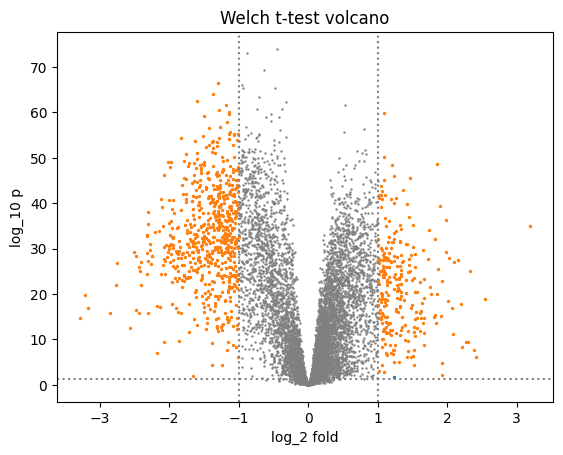

In [14]:
# Using volcano plot to select feature.
vol = Volcano_selection(k= -1, strategy = "p", log_domain=False, absolute= False)
vol_importance = vol.Select(
    x_copy, y)  # The number of features to select, and -1 means choose all.

# Plot the vlcano plot.
vol.plotting()

In [15]:
from PineBioML.selection.ensemble import selector

# Use several way to select features, which includes decision tree, random forest, lasso, multi lasso, svm, adaboost, xgboost
important_feature, importance = selector(k = 100, RF_trees = 1024*8).Select(x, y)

Using  c45  to select.


100%|██████████| 9028/9028 [00:23<00:00, 384.35it/s]


c45  is done.

Using  RF_gini  to select.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 8192 out of 8192 | elapsed:   17.2s finished


RF_gini  is done.

Using  AdaBoost  to select.
I don't have a progress bar but I am running
AdaBoost  is done.

Using  Lasso_Bisection  to select.


C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.621e-01, tolerance: 4.575e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.909e-02, tolerance: 4.575e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-pac

Lasso_Bisection  is done.

Using  multi_Lasso  to select.


C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.621e-01, tolerance: 4.575e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.555e-01, tolerance: 4.575e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-pac

multi_Lasso  is done.

Using  SVM  to select.
SVM  is done.

Using  XGboost  to select.
XGboost  is done.

Using  Lightgbm  to select.
[LightGBM] [Info] Number of positive: 103, number of negative: 80
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 533388
[LightGBM] [Info] Number of data points in the train set: 183, number of used features: 9028
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [16]:
# The features that was selected by ML algoritms.
important_feature

,DT_score_c45,RandomForest_gini,AdaBoost128,LassoLinear,multi_Lasso,SVM,XGboost,Lightgbm
0,CMC1,LLGL2,CMC1,COL18A1,COX6B1,UMOD,PFKP,LLGL2
1,NDUFV1,NDUFV1,NaN,FBLN5,HADH,HBD,LARS2,PFKP
2,LLGL2,SUOX,NaN,HADH,NDUFA4,VIM,LLGL2,PYGL
3,PFKP,SPTBN2,NaN,COL14A1,ACSF2,ANXA4,MPP7,NDUFA8
4,ALDH4A1,CMC1,NaN,FHL2,TINAGL1,PGK1,NaN,NDUFS1
...,...,...,...,...,...,...,...,...
95,CST3,TSPAN8,NaN,CRYAB,NDRG1,CALB1,NaN,PRSS8
96,DDI2,NDUFV2,NaN,AHNAK,AMBP,WFDC2,NaN,PCK2
97,PGM3,SUCLG2,NaN,LAP3,GM2A,PRDX3,NaN,MZT1
98,CYP2J2,FXYD2,NaN,S100A2,CRYAB,MDH1,NaN,TRIM9


In [17]:
# The feature importance given by diffirent methods.
# Please Notice that the score between diffirent methods is not comparable.
importance

,DT_score_c45,RandomForest_gini,AdaBoost128,LassoLinear,multi_Lasso,SVM,XGboost,Lightgbm
CMC1,0.586541,0.009231,1.0,NaN,NaN,NaN,NaN,NaN
NDUFV1,0.586541,0.009541,NaN,NaN,NaN,NaN,NaN,2.0
LLGL2,0.586541,0.010387,NaN,NaN,NaN,NaN,0.139743,25.0
PFKP,0.585994,0.006815,NaN,NaN,0.020912,0.002811,0.563536,24.0
ALDH4A1,0.581548,NaN,NaN,NaN,0.008223,0.003052,NaN,NaN
...,...,...,...,...,...,...,...,...
MLXIP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
PRSS8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
MZT1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
TRIM9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


# Analysis utils

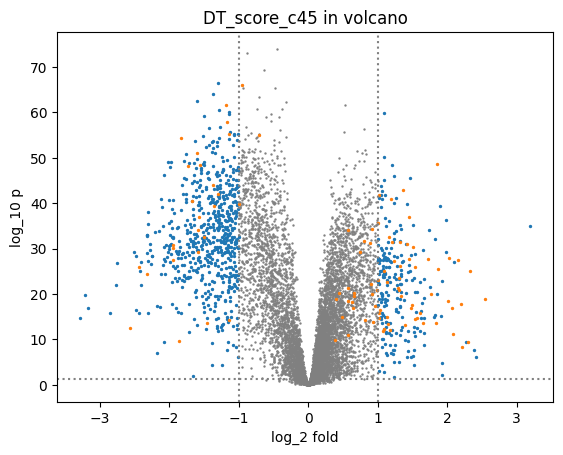

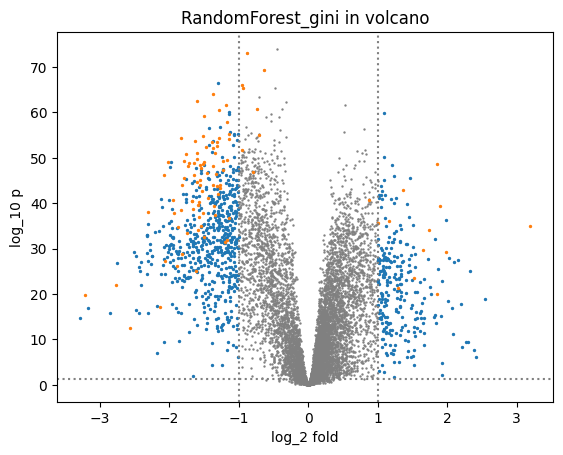

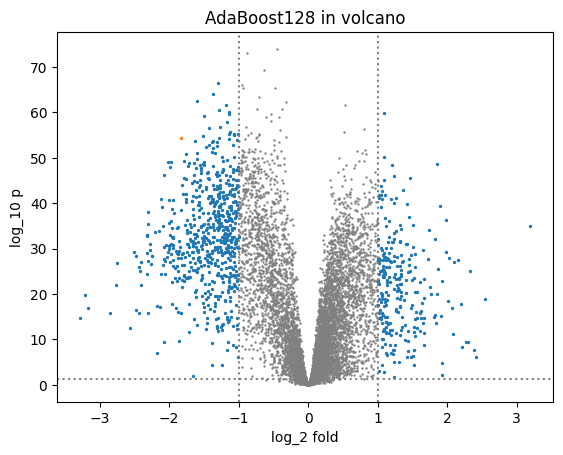

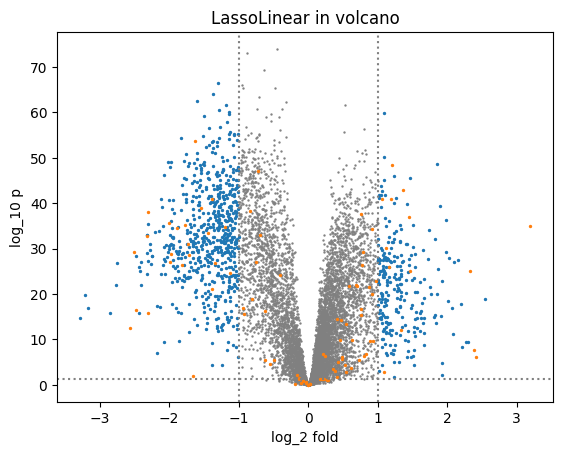

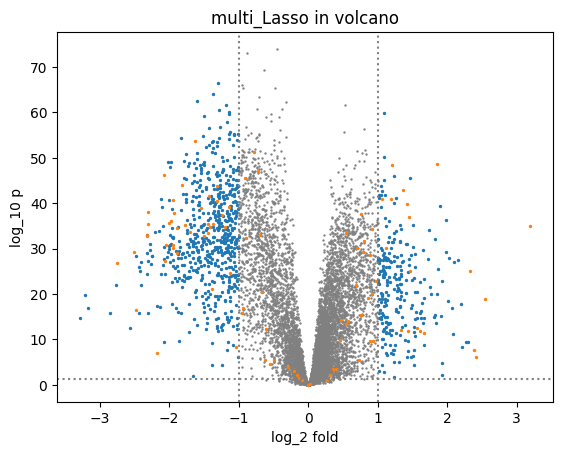

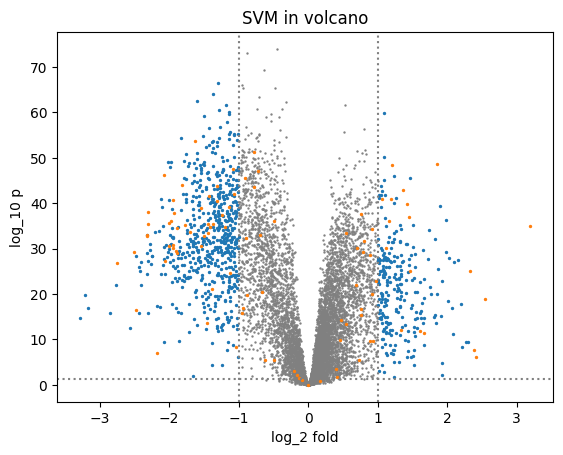

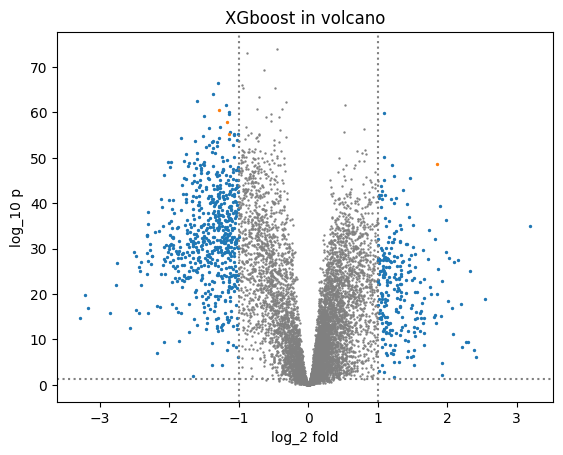

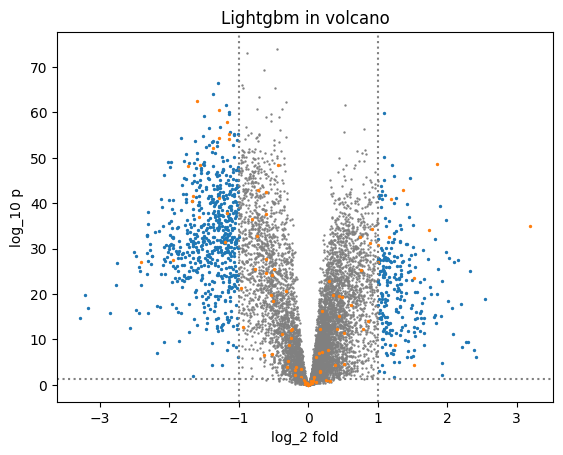

In [18]:
### Plot important features from diffirent methods on volcano plot.
for method in importance:
    vol.plotting(external=True,
                 external_score=importance[method].dropna(),
                 title=method + " in volcano",
                 show=False,
                 saving=True,
                 save_path="./output/images/" + export_title)

In [19]:
# Using g:profiler to do gene enrichment.
gp_enrichment_result = []
for method in important_feature.columns:
    gp_result = gp.profile(query = important_feature[method].dropna().to_list()).sort_values("p_value")
    gp_result["method"] = method
    gp_enrichment_result.append(gp_result[["method", "source", "native", "parents", "p_value", "description", "intersection_size"]])
gp_enrichment_result = pd.concat(gp_enrichment_result,
                                 axis=0).reset_index(drop=True)
# The result
gp_enrichment_result

,method,source,native,parents,p_value,description,intersection_size
0,DT_score_c45,GO:BP,GO:0044281,[GO:0008152],7.068369e-13,"""The chemical reactions and pathways involving...",37
1,DT_score_c45,GO:BP,GO:0006091,[GO:0044237],1.773804e-11,"""The chemical reactions and pathways resulting...",21
2,DT_score_c45,GO:BP,GO:0019752,[GO:0043436],2.276843e-11,"""The chemical reactions and pathways involving...",26
3,DT_score_c45,KEGG,KEGG:01100,[KEGG:00000],3.574282e-11,Metabolic pathways,39
4,DT_score_c45,GO:BP,GO:0055086,"[GO:0006139, GO:0044281]",3.704507e-11,"""The cellular chemical reactions and pathways ...",23
...,...,...,...,...,...,...,...
1595,Lightgbm,GO:BP,GO:0044281,[GO:0008152],4.135363e-02,"""The chemical reactions and pathways involving...",22
1596,Lightgbm,CORUM,CORUM:6417,[CORUM:0000000],4.969340e-02,Fibrinogen complex,2
1597,Lightgbm,GO:MF,GO:0004739,"[GO:0004738, GO:0016624]",4.970687e-02,"""Catalysis of the reaction: pyruvate + lipoami...",2
1598,Lightgbm,GO:MF,GO:0016774,[GO:0016772],4.970687e-02,"""Catalysis of the transfer of a phosphorus-con...",2


In [20]:
# Showing the top 10 significant result
gp_enrichment_result.sort_values("p_value").head(20)

,method,source,native,parents,p_value,description,intersection_size
711,multi_Lasso,GO:CC,GO:0070062,"[GO:0005615, GO:1903561]",1.156752e-48,"""A vesicle that is released into the extracell...",72
712,multi_Lasso,GO:CC,GO:1903561,"[GO:0031982, GO:0065010]",2.562928e-48,"""Any vesicle that is part of the extracellular...",72
714,multi_Lasso,GO:CC,GO:0065010,"[GO:0043227, GO:0043230]",2.648758e-48,"""Organized structure of distinctive morphology...",72
713,multi_Lasso,GO:CC,GO:0043230,"[GO:0005576, GO:0043226]",2.648758e-48,"""Organized structure of distinctive morphology...",72
1088,SVM,GO:CC,GO:0070062,"[GO:0005615, GO:1903561]",2.818549e-47,"""A vesicle that is released into the extracell...",71
1089,SVM,GO:CC,GO:1903561,"[GO:0031982, GO:0065010]",6.164908e-47,"""Any vesicle that is part of the extracellular...",71
1090,SVM,GO:CC,GO:0065010,"[GO:0043227, GO:0043230]",6.367963e-47,"""Organized structure of distinctive morphology...",71
1091,SVM,GO:CC,GO:0043230,"[GO:0005576, GO:0043226]",6.367963e-47,"""Organized structure of distinctive morphology...",71
425,LassoLinear,GO:CC,GO:0070062,"[GO:0005615, GO:1903561]",7.711704e-43,"""A vesicle that is released into the extracell...",67
426,LassoLinear,GO:CC,GO:1903561,"[GO:0031982, GO:0065010]",1.605930e-42,"""Any vesicle that is part of the extracellular...",67


# Modeling

In [21]:
from sklearn.model_selection import cross_val_score
from PineBioML.model.supervised.Classification import SVM_tuner

In [22]:
# global scaling
#x = x / x.values.std()

# standarize
x = (x - x.mean()) / x.std()

svm_performance = []
for k in [5, 20]:
    performance = {}
    for method in important_feature.columns:
        top_k = important_feature.head(k)[method].dropna()
        
        best_svc = SVM_tuner().tune(x[top_k], y)
        performance[method] = cross_val_score(best_svc, x[top_k], y, n_jobs=-1, cv=5, scoring = "roc_auc").mean()
    svm_performance.append(pd.Series(performance, name="top" + str(k)))

#The result
svm_performance = pd.concat(svm_performance, axis=1)
svm_performance

optuna seed 71  |  validation seed 5013  |  model seed 14515
    start tuning. it will take a while.
    optuna is better, best trial:  1
SVC(C=0.28237182655143406, class_weight='balanced', gamma='auto',
    probability=True, random_state=15618) 

optuna seed 71  |  validation seed 12522  |  model seed 3909
    start tuning. it will take a while.
    optuna is better, best trial:  1
SVC(C=0.28237182655143406, class_weight='balanced', gamma='auto',
    probability=True, random_state=13221) 

optuna seed 71  |  validation seed 5869  |  model seed 5158
    start tuning. it will take a while.
    optuna is better, best trial:  1
SVC(C=0.28237182655143406, class_weight='balanced', gamma='auto',
    probability=True, random_state=5193) 

optuna seed 71  |  validation seed 15653  |  model seed 3375
    start tuning. it will take a while.
    optuna is better, best trial:  1
SVC(C=0.28237182655143406, class_weight='balanced', gamma='auto',
    probability=True, random_state=7083) 

optuna seed

,top5,top20
DT_score_c45,1.0,1.0
RandomForest_gini,1.0,1.0
AdaBoost128,1.0,1.0
LassoLinear,1.0,1.0
multi_Lasso,1.0,1.0
SVM,1.0,1.0
XGboost,1.0,1.0
Lightgbm,1.0,1.0


# Output

In [23]:
# Save the result ro output_path
important_feature.to_csv(output_folder + export_title + " important feature.csv")
importance.to_csv(output_folder+export_title+ " importance.csv")
gp_enrichment_result.to_csv(output_folder+export_title+ " g_prophiler.csv")
svm_performance.to_csv(output_folder+export_title+ " rbfSVM_performance.csv")
vol_importance.to_csv(output_folder + export_title + " volcano_foldchange.csv")